In [1]:
import sys
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
#connect local PATH
p = os.path.abspath(r'C:\Users\Ben\Desktop\Diplomatiki')
sys.path.append(str(p))

from CryptoSent.tools import utils as cs


#models
from CryptoSent.cs_models.distilbert import distil_bert_df,distil_bert
from CryptoSent.tools.crypto_coin_actual import get_btc_actual_hourly
from CryptoSent.tools import evaluation as eval
#from CryptoSent.cs_models.finbertlong import fin_bert_long
#from CryptoSent.cs_models.distilbert import distil_bert

In [2]:
btc=get_btc_actual_hourly()

100%|██████████| 30907/30907 [00:00<00:00, 166850.75it/s]


In [3]:
p=r'C:\Users\Ben\Desktop\Diplomatiki\CryptoSent\Datasets\Main Dataset\submissions.pickle'
df=pd.read_pickle(p)

# selecting btc only
df=df[df.subreddit=='Bitcoin']
df=df.sort_values(by='score',ascending=False)
top=df.head(1000)

In [5]:
top

,author,num_comments,score,title,selftext,award_name,award_description,award_count,award_coin_price,award_coin_reward,...,id,domain,no_follow,send_replies,author_fullname,subreddit_id,permalink,url,created,author_created
created,,,,,,,,,,,,,,,,,,,,,
2021-02-08 13:48:45,AlphaGrayWolf,2954,45445,Tesla buys $1.5b in Bitcoin and is looking to ...,NaN,"(Wholesome Seal of Approval, All-Seeing Upvote...","(A glittering stamp for a feel-good thing, A g...","(1, 5, 1, 1, 1, 3, 1, 3, 3, 3, 36, 31, 56, 1, ...","(30, 30, 20, 20, 250, 75, 1800, 500, 500, 325,...","(0, 0, 0, 0, 100, 100, 0, 100, 100, 0, 0, 0, 0...",...,lfb3mm,v.redd.it,False,True,t2_u4c9x3c,t5_2s3qj,/r/Bitcoin/comments/lfb3mm/tesla_buys_15b_in_b...,https://v.redd.it/gazga81l29g61,2021-02-08 13:48:45,2018-01-27 23:07:31
2021-01-28 17:11:32,Secret_Operative,1569,39940,Robinhood just blocked several stocks from bei...,Anyone following the WSB drama this morning wi...,"(Take My Power, Bravo Grande!, Wholesome Seal ...","(Add my power to yours., For an especially ama...","(1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 21,...","(75, 75, 30, 30, 30, 20, 20, 200, 300, 75, 500...","(0, 0, 0, 0, 0, 0, 0, 0, 250, 100, 100, 0, 0, ...",...,l70vrq,self.Bitcoin,False,False,t2_7apecu5u,t5_2s3qj,/r/Bitcoin/comments/l70vrq/robinhood_just_bloc...,https://www.reddit.com/r/Bitcoin/comments/l70v...,2021-01-28 17:11:32,2020-07-16 17:16:15
2019-07-24 20:24:16,khaotickk,586,36690,"Quick, upvote this to confuse everyone into th...",NaN,"(Gold, Silver)","(Gives the author a week of Reddit Premium, %{...","(2, 3)","(500, 100)","(100, 0)",...,chbx9d,i.redd.it,False,True,t2_adaoe,t5_2s3qj,/r/Bitcoin/comments/chbx9d/quick_upvote_this_t...,https://i.redd.it/pcioshemnac31.gif,2019-07-24 20:24:16,2013-01-26 09:07:51
2021-05-19 13:50:39,winklebone,1177,24236,I don't care cat,NaN,"(Party Train, Helpful (Pro), Gold, Blow a Kiss...",(All aboard! Every five Party Train Awards giv...,"(3, 1, 6, 1, 7, 51, 49, 1, 49, 3, 43, 1)","(75, 500, 500, 300, 250, 150, 125, 125, 100, 1...","(100, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0)",...,ng3otr,v.redd.it,False,True,t2_10u48d,t5_2s3qj,/r/Bitcoin/comments/ng3otr/i_dont_care_cat/,https://v.redd.it/zkdh1j8jf2071,2021-05-19 13:50:39,2016-08-24 10:29:24
2021-01-03 11:11:54,Ribtin,1381,22629,I just sold,I'm up more than 110x so I just sold a chunk a...,"(Narwhal Salute, All-Seeing Upvote, Gold, Brav...","(A golden splash of respect, A glowing commend...","(1, 1, 2, 2, 1, 22, 20, 1, 27, 16, 1, 16, 1)","(30, 30, 500, 400, 350, 300, 150, 150, 125, 10...","(0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",...,kpi6pa,self.Bitcoin,False,True,t2_911j,t5_2s3qj,/r/Bitcoin/comments/kpi6pa/i_just_sold/,https://www.reddit.com/r/Bitcoin/comments/kpi6...,2021-01-03 11:11:54,2006-06-30 08:41:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-25 18:10:32,JTCampbellJr,140,1622,Microsoft Allows BTC Payments,NaN,Empty,Empty,Empty,Empty,Empty,...,e1j13u,i.redd.it,False,False,t2_t3bvx,t5_2s3qj,/r/Bitcoin/comments/e1j13u/microsoft_allows_bt...,https://i.redd.it/pnt9xyz97v041.png,2019-11-25 18:10:32,2015-12-20 05:32:55
2019-10-07 19:27:04,BossGro,47,1621,South Park’s reaction after the last price drop,NaN,Empty,Empty,Empty,Empty,Empty,...,demnfp,i.redd.it,False,True,t2_nthahge,t5_2s3qj,/r/Bitcoin/comments/demnfp/south_parks_reactio...,https://i.redd.it/q3nr7wksl5r31.jpg,2019-10-07 19:27:04,2018-07-24 19:42:53
2021-05-22 08:36:54,slywalkers,155,1620,Laszlo Hanyecz is known as the first person to...,NaN,"(Helpful, Wholesome, Silver, Heartwarming)","(Thank you stranger. Shows the award., When yo...","(7, 2, 5, 1)","(150, 125, 100, 100)","(0, 0, 0, 0)",...,nicj57,v.redd.it,False,True,t2_b7tfi6h,t5_2s3qj,/r/Bitcoin/comments/nicj57/laszlo_hanyecz_is_k...,https://v.redd.it/bldfmsd5am071,2021-05-22 08:36:54,2017-08-21 02:49:53


In [17]:
top=distil_bert_df(top,'title','sentiment')

100%|██████████| 100000/100000 [35:11<00:00, 47.36it/s]
C:\Users\Ben\Desktop\Diplomatiki\CryptoSent\cs_models\distilbert.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Load top100K btc


In [3]:
top=pd.read_pickle(r'C:\Users\Ben\Desktop\Diplomatiki\CryptoSent\Datasets\other\btc_subs_top100k.pickle')

In [4]:
eval.get_ts_2axis(top.sent_db,btc.avg_hl,resample_period='w',btc_transformation='pct_change')

## Experts KPI

In [5]:
def get_experts(df):
    df.award_count=df.award_count.replace('Empty',0)
    df.award_coin_price=df.award_coin_price.replace('Empty',0)
    df['kpi1']=df.apply(lambda row: row['award_count']*row['award_coin_price'] if type(row['award_count'])==int
                                            else sum(np.multiply(np.array(list(row['award_count'])),np.array(list(row['award_coin_price'])))),axis=1)

    #top_authors=df[df.author!='[deleted]'].sort_values(by='kpi1',ascending=False).head(1000).author.unique().tolist()
    #return top_authors
    #top_authors_df=top[top.author.isin(get_experts(top))]
get_experts(top)
qa=top[['kpi1','score','num_comments','sent_db','id']]
qa=qa.replace(0,1)
qa['influence']=np.log((qa.kpi1*qa.score*qa.num_comments))
qa['kpi2']=np.log((qa.kpi1*qa.score*qa.num_comments))*qa.sent_db
qa=qa.sort_values(by='influence',ascending=False)

In [6]:
qa

,kpi1,score,num_comments,sent_db,id,influence,kpi2
created,,,,,,,
2021-02-08 13:48:45,25205,45445,2954,-0.834298,lfb3mm,28.849971,-24.069481
2021-02-18 08:23:21,29050,13814,3684,-0.973788,lmgsnj,28.021966,-27.287463
2021-05-16 20:34:03,26480,16814,3065,-0.998624,ndunlj,27.941915,-27.903455
2021-05-19 13:50:39,28365,24236,1177,-0.999085,ng3otr,27.419230,-27.394153
2021-01-07 11:50:33,73505,13347,683,0.999705,ksay65,27.230650,27.222607
...,...,...,...,...,...,...,...
2019-08-18 01:37:23,1,2,1,-0.926497,crtr3y,0.693147,-0.642199
2019-04-09 17:40:11,1,2,1,0.944449,bb9f0p,0.693147,0.654642
2020-02-18 12:16:19,1,2,1,-0.993006,f5q9t4,0.693147,-0.688299


In [40]:
eval.get_ts_2axis(top.sent_db,btc.avg_hl,resample_period='w',btc_transformation='pct_change')

In [13]:
eval.get_ts_2axis(qa.head(10000).kpi2,btc.avg_hl,resample_period='w',btc_transformation='pct_change')

In [42]:
eval.get_ts_2axis(qa.tail(10000).kpi2,btc.avg_hl,resample_period='d',btc_transformation='pct_change')

C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



<AxesSubplot:>

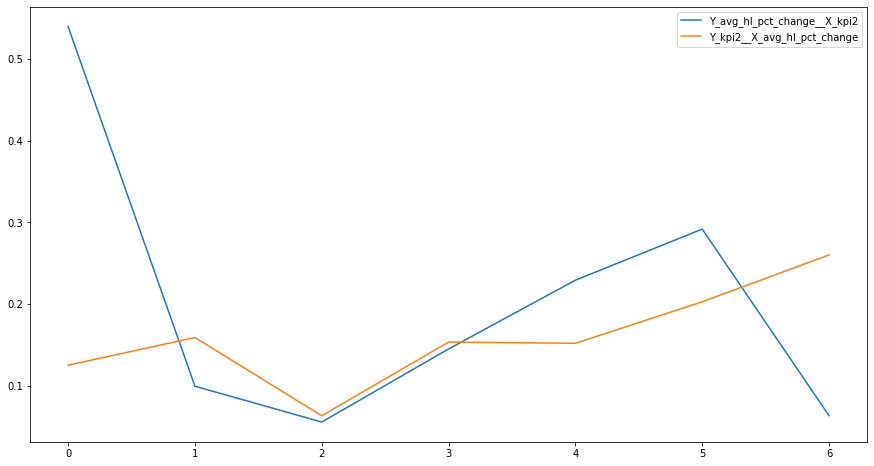

In [36]:
res=eval.result_processing(qa['2020-05':].head(10000).kpi2,btc.avg_hl,resample_period='d')
inm=res[['kpi2','avg_hl_pct_change']].dropna()
eval.get_granger_causality(inm,maxlag=7).plot(figsize=(15,8))


# Granger Causality

<AxesSubplot:>

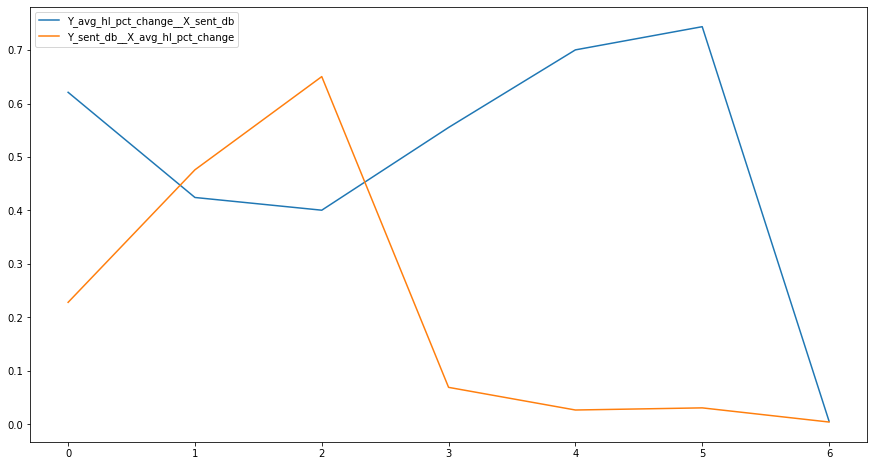

In [23]:
res=eval.result_processing(top.sent_db,btc.avg_hl,resample_period='d')
inm=res[['sent_db','avg_hl_pct_change']].dropna()
eval.get_granger_causality(inm,maxlag=7).plot(figsize=(15,8))

In [24]:
df=top.copy()
df.award_count=df.award_count.replace('Empty',0)
df.award_coin_price=df.award_coin_price.replace('Empty',0)
df['kpi1']=df.apply(lambda row: row['award_count']*row['award_coin_price'] if type(row['award_count'])==int
                                        else sum(np.multiply(np.array(list(row['award_count'])),np.array(list(row['award_coin_price'])))),axis=1)

top_authors=df[df.author!='[deleted]'].sort_values(by='kpi1',ascending=False).head(1000).author.unique().tolist()
top_authors_df=df[df.author.isin(top_authors)]
bottom_authors_df=df[~df.author.isin(top_authors)]

<AxesSubplot:>

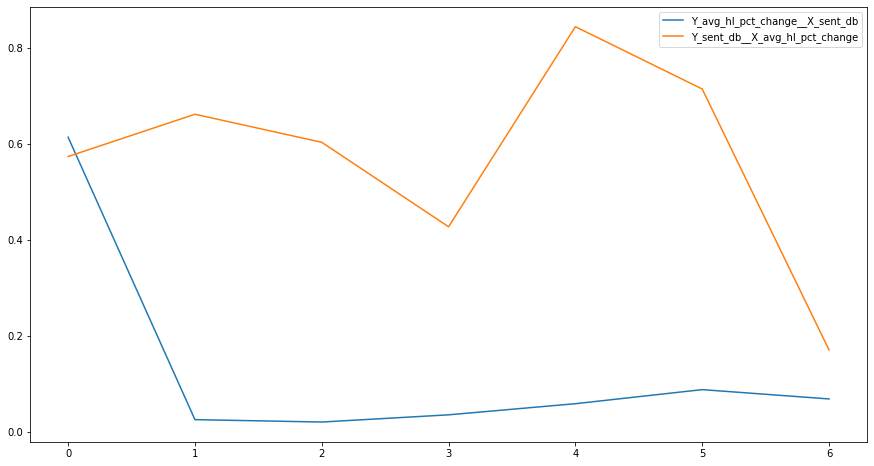

In [39]:
res=eval.result_processing(top_authors_df.sent_db,btc.avg_hl,resample_period='d')
inm=res[['sent_db','avg_hl_pct_change']].dropna()
eval.get_granger_causality(inm,maxlag=7).plot(figsize=(15,8))

<AxesSubplot:>

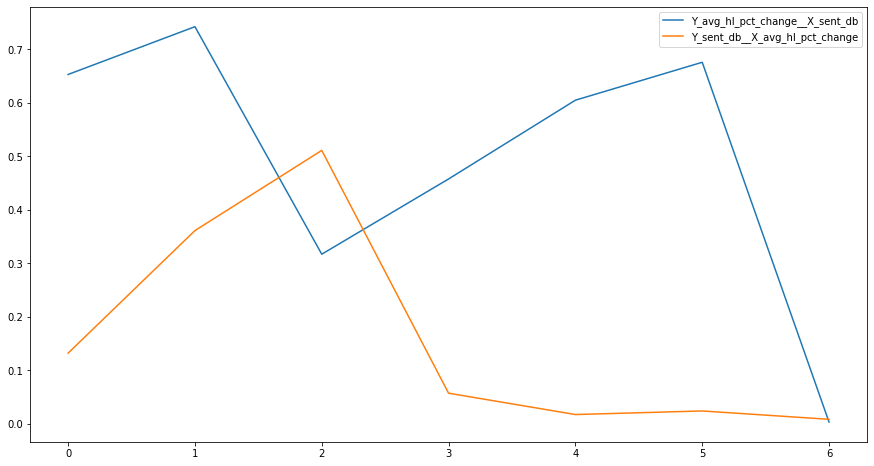

In [31]:
res=eval.result_processing(bottom_authors_df.sent_db,btc.avg_hl,resample_period='d')
inm=res[['sent_db','avg_hl_pct_change']].dropna()
eval.get_granger_causality(inm,maxlag=7).plot(figsize=(15,8))

<AxesSubplot:>

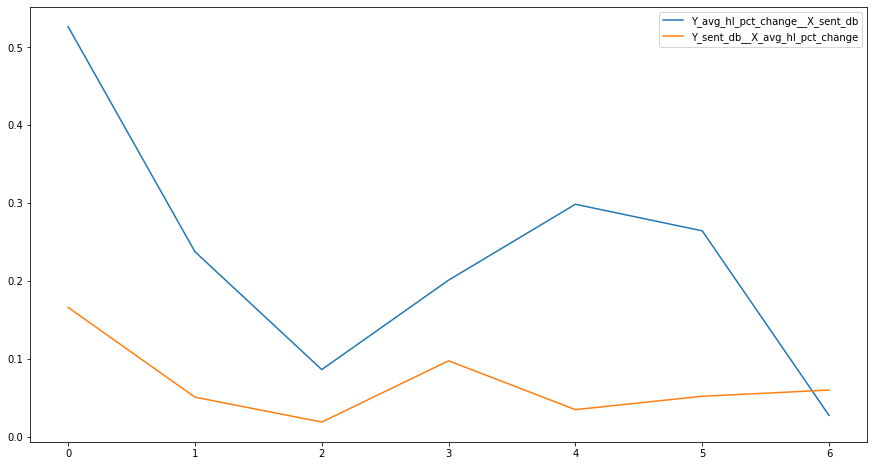

In [22]:
res=eval.result_processing(df.sort_values(by='kpi1',ascending=False).head(10000).sent_db,btc.avg_hl,resample_period='d')
inm=res[['sent_db','avg_hl_pct_change']].dropna()
eval.get_granger_causality(inm,maxlag=7).plot(figsize=(15,8))

<AxesSubplot:>

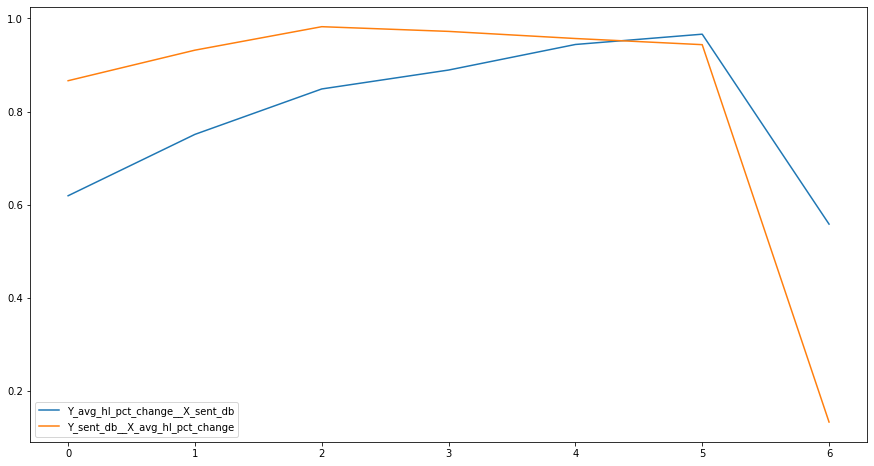

In [23]:
res=eval.result_processing(df.sort_values(by='kpi1',ascending=False).tail(10000).sent_db,btc.avg_hl,resample_period='d')
inm=res[['sent_db','avg_hl_pct_change']].dropna()
eval.get_granger_causality(inm,maxlag=7).plot(figsize=(15,8))

# MultiVariete fbprophet

In [2]:
import pandas as pd
from fbprophet import Prophet


In [3]:
df_lr=pd.read_pickle(r"C:\Users\Ben\Desktop\Diplomatiki\CryptoSent\Sentiment Models\subs_lr_sent.pickle")

In [17]:
def get_experts(df):
    df.award_count=df.award_count.replace('Empty',0)
    df.award_coin_price=df.award_coin_price.replace('Empty',0)
    df['kpi1']=df.apply(lambda row: row['award_count']*row['award_coin_price'] if type(row['award_count'])==int
                                            else sum(np.multiply(np.array(list(row['award_count'])),np.array(list(row['award_coin_price'])))),axis=1)

    #top_authors=df[df.author!='[deleted]'].sort_values(by='kpi1',ascending=False).head(1000).author.unique().tolist()
    #return top_authors
    #top_authors_df=top[top.author.isin(get_experts(top))]
get_experts(df_lr)
qa=df_lr[['kpi1','score','num_comments','polarity_lr','id']]
qa=qa.replace(0,1)
qa['influence']=np.log((qa.kpi1*qa.score*qa.num_comments))
qa['kpi2']=np.log((qa.kpi1*qa.score*qa.num_comments))*qa.polarity_lr
qa=qa.sort_values(by='influence',ascending=False)

In [18]:
qa

,kpi1,score,num_comments,polarity_lr,id,influence,kpi2
created,,,,,,,
2021-04-18 18:49:42,68290,20838,9510,0.610516,mtghzc,30.236151,18.459647
2021-05-31 12:01:31,27050,43785,7539,0.032756,noztp7,29.820334,0.976787
2021-05-08 17:28:35,37725,52190,4303,-0.227182,n7rl2y,29.767792,-6.762707
2021-03-25 04:00:55,28325,5881,29640,0.446323,mcoaa3,29.227862,13.045076
2021-05-10 20:29:24,89190,19640,2427,0.166275,n9cby0,29.078259,4.834980
...,...,...,...,...,...,...,...
2020-09-25 10:36:30,1,1,1,-0.194331,izfxuy,0.000000,-0.000000
2020-09-25 10:47:07,1,1,1,-0.044113,izg1og,0.000000,-0.000000
2020-09-25 10:47:09,1,1,1,0.326518,izg1ou,0.000000,0.000000


In [4]:
btc=get_btc_actual_hourly().resample('d').mean()[['avg_hl']].reset_index().\
    rename(columns={'datetime':'ds','avg_hl':'y'})

100%|██████████| 30907/30907 [00:00<00:00, 147378.29it/s]


In [121]:
train=btc[btc.ds<'2021-09']
test=btc[btc.ds>'2021']

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


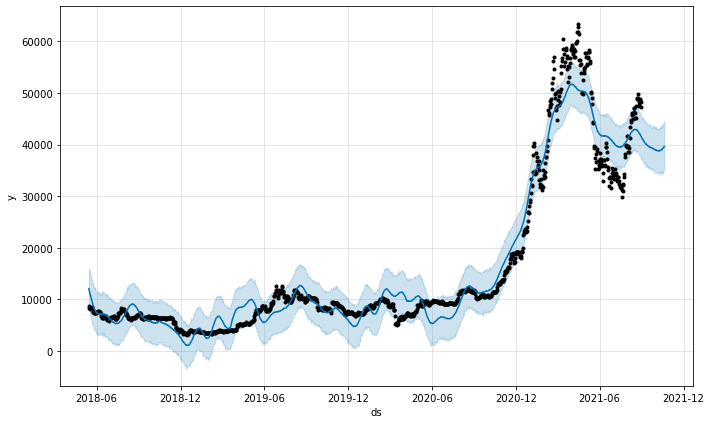

In [122]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=50)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


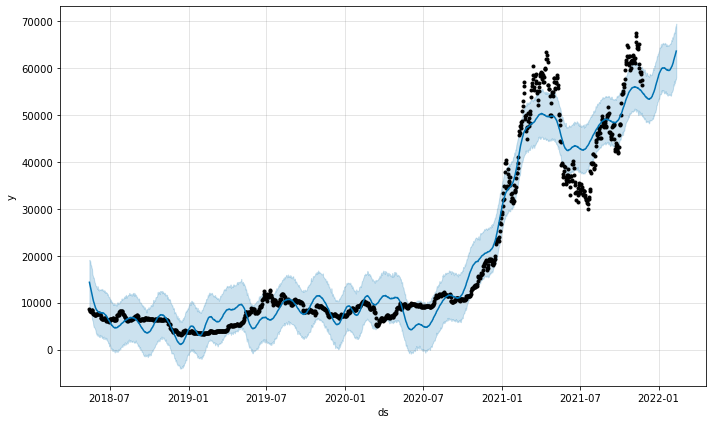

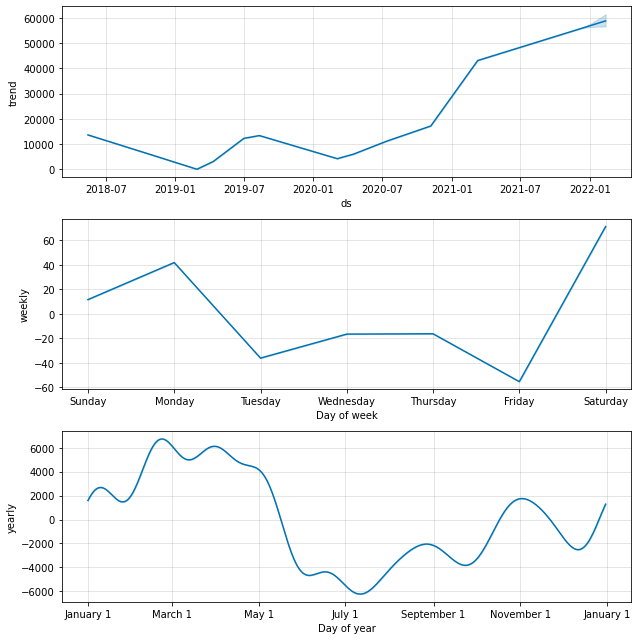

In [123]:
m = Prophet()
m.fit(btc)
future = m.make_future_dataframe(periods=80)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)



## Add regressor

In [8]:
sent1=df_lr.resample('d').sum()[['num_comments','score','polarity_lr']]

In [9]:
btc.index=pd.to_datetime(btc.ds)

In [10]:
btc

,ds,y
ds,,
2018-05-15,2018-05-15,8639.965000
2018-05-16,2018-05-16,8299.077708
2018-05-17,2018-05-17,8295.688542
2018-05-18,2018-05-18,8090.684375
2018-05-19,2018-05-19,8257.043750
...,...,...
2021-11-19,2021-11-19,57169.139167
2021-11-20,2021-11-20,58640.880417
2021-11-21,2021-11-21,59204.600208


In [35]:
eval.get_ts_2axis(qa.head(10000).polarity_lr,btc.y,resample_period='4d',btc_transformation='diff')

In [12]:
eval.get_ts_2axis(sent1.polarity_lr,btc.y,resample_period='w',btc_transformation='none')

<AxesSubplot:>

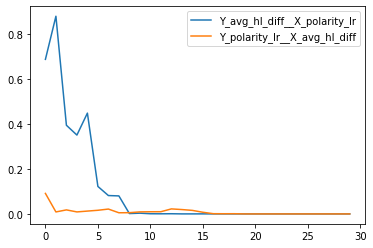

In [116]:

merres=eval.result_processing(qa.head(10000).polarity_lr.fillna(0),btc.rename(columns={'y':'avg_hl'}).avg_hl,resample_period='d')
eval.get_granger_causality(merres[['polarity_lr','avg_hl_diff']].dropna(),maxlag=30).plot()

In [59]:
merres

,polarity_lr,avg_hl,avg_hl_diff,avg_hl_pct_change,sent_db_shift,sent_db_ptc_change
2019-02-13,-0.512880,3582.083958,NaN,NaN,NaN,NaN
2019-02-14,0.000000,3569.421250,-12.662708,-0.003535,-0.512880,-1.000000
2019-02-15,0.000000,3570.422083,1.000833,0.000280,0.000000,NaN
2019-02-16,0.000000,3587.027292,16.605208,0.004651,0.000000,NaN
2019-02-17,0.000000,3583.670625,-3.356667,-0.000936,0.000000,NaN
...,...,...,...,...,...,...
2021-06-27,-1.423812,32849.404583,1349.501250,0.042841,3.893686,-1.365672
2021-06-28,0.964262,34465.523750,1616.119167,0.049198,-1.423812,-1.677240
2021-06-29,1.008338,35427.257917,961.734167,0.027904,0.964262,0.045710
2021-06-30,7.081093,34994.297292,-432.960625,-0.012221,1.008338,6.022542


In [104]:
pin=merres[['polarity_lr','avg_hl_diff','avg_hl_pct_change','avg_hl']].dropna().reset_index().\
    rename(columns={'index':'ds','avg_hl':'y'})


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


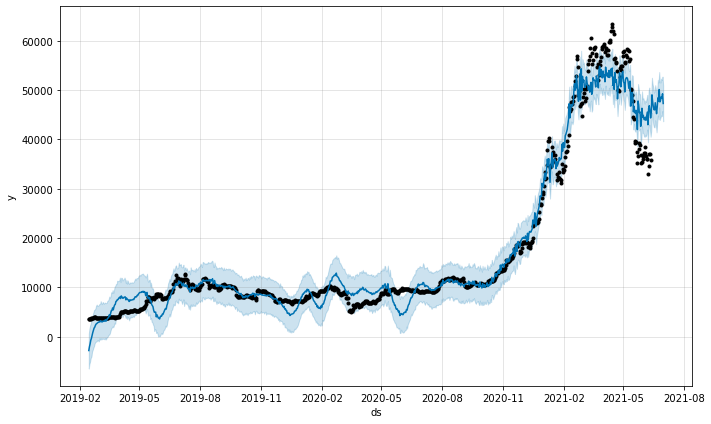

In [108]:


m = Prophet()
m.add_regressor('polarity_lr')
m.add_regressor('avg_hl_diff')
m.add_regressor('avg_hl_pct_change')
m.fit(pin.head(850))
forecast = m.predict(pin.drop(columns="y"))

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)


# Normalization

## Title + Body

In [10]:
df=top.copy()
df.award_count=df.award_count.replace('Empty',0)
df.award_coin_price=df.award_coin_price.replace('Empty',0)
df['kpi1']=df.apply(lambda row: row['award_count']*row['award_coin_price'] if type(row['award_count'])==int
                                        else sum(np.multiply(np.array(list(row['award_count'])),np.array(list(row['award_coin_price'])))),axis=1)

top_authors=df[df.author!='[deleted]'].sort_values(by='kpi1',ascending=False).head(1000).author.unique().tolist()
s=df[df.author.isin(top_authors)]
s.selftext=s.selftext.fillna(' ')
s.title=s.title.fillna(' ')
s['all_text']=s.title+' '+s.selftext

## Text Processing

In [48]:
# Import spaCy and load the language library
import spacy

nlp = spacy.load('en_core_web_sm')

def text_processing_spacy(text):
    # Create a Doc object
    doc = nlp(text)
    token_list = []
    # collect each token separately with their POS Tag, dependencies and lemma
    for token in doc:
        output = [token.text, token.pos_, token.dep_,token.lemma_]
        token_list.append(output)
    # create DataFrame using data 
    dfnew = pd.DataFrame(token_list, columns =['Word', 'POS Tag', 'Dependencies', 'Lemmatized Word']) 

    df_nopunct = dfnew[dfnew['POS Tag']!='PUNCT']

    lemma_word = df_nopunct['Lemmatized Word'].values.tolist()
    stopword = nlp.Defaults.stop_words
    # Add the word to the set of stop words. Use lowercase!
    nlp.Defaults.stop_words.add('btw')
    is_stopword_list = []
    for word in lemma_word:
        is_stopword = nlp.vocab[word].is_stop
        is_stopword_list.append(is_stopword)
    df_nopunct["is_stopword"] = is_stopword_list
    df_nopunct
    clean_df = df_nopunct[df_nopunct["is_stopword"]==False]
    clean_list = clean_df["Lemmatized Word"].values.tolist()
    retout=' '.join(clean_list)
    return retout

In [53]:
s['all_text_clean']=s.all_text.progress_apply(text_processing_spacy)

  0%|          | 0/12031 [00:00<?, ?it/s]C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 12031/12031 [02:37<00:00, 76.22it/s] 
C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Applying FinBert

In [67]:
#from CryptoSent.cs_models.finbertlong import fin_bert_long
from CryptoSent.cs_models.finbert import fin_bert


In [72]:
s['all_text_clean_capped']=s.all_text_clean.apply(lambda x: ' '.join(x.split()[:100]))
s['fin_bert']=s.all_text_clean_capped.progress_apply(fin_bert)

C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

 14%|█▍        | 1708/12031 [01:46<10:45, 15.98it/s]


RuntimeError: The size of tensor a (786) must match the size of tensor b (512) at non-singleton dimension 1

# Emojis Normalized


In [ ]:
emojis=['🚀','✅','✔️','✨','⭐','🔥']
s.all_text_clean.str.contains('|'.join(emojis),case=False)

In [82]:
p=r'C:\Users\Ben\Desktop\Diplomatiki\CryptoSent\Datasets\Main Dataset\submissions.pickle'
df_raw=pd.read_pickle(p)

# selecting btc only
dfbtc=df_raw[df_raw.subreddit=='Bitcoin']


In [85]:
dfbtc.selftext=dfbtc.selftext.fillna(' ')
dfbtc.title=dfbtc.title.fillna(' ')
dfbtc['all_text']=dfbtc.title+' '+dfbtc.selftext

C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
emojis=['🚀','✅','✔️','✨','⭐','🔥']
dfbtc.loc[dfbtc.all_text.str.contains('|'.join(emojis),case=False),'pos_emoji']=True
dfbtc.pos_emoji=dfbtc.pos_emoji.fillna(False)


C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
emjres=dfbtc[['pos_emoji','id']].resample('d').agg({'pos_emoji': np.sum, 'id': 'count'})
emjres['emoji_subs_ratio']=(emjres.pos_emoji/emjres.id)*100

In [115]:
eval.get_ts_2axis(emjres.emoji_subs_ratio,btc.avg_hl,resample_period='w',btc_transformation='pct_change')

In [124]:
from datetime import datetime
def result_processing2(sentiment,coin_price,resample_period='d'):
    sdmin=datetime.strftime(sentiment.index.min(),'%Y-%m-%d')
    sdmax=datetime.strftime(sentiment.index.max(),'%Y-%m-%d')
    sent=sentiment.resample(resample_period).sum()
    btc=coin_price[sdmin:sdmax].resample(resample_period).mean()
    merres=pd.concat([sent,btc],axis=1)
    merres.loc[:,'avg_hl_diff']=merres.avg_hl.diff()
    merres.loc[:,'avg_hl_pct_change']=merres.avg_hl.pct_change()
    merres.loc[:,'sent_db_shift']=sent.shift(1)
    merres.loc[:,'sent_db_ptc_change']=sent.pct_change()
    return merres


<AxesSubplot:>

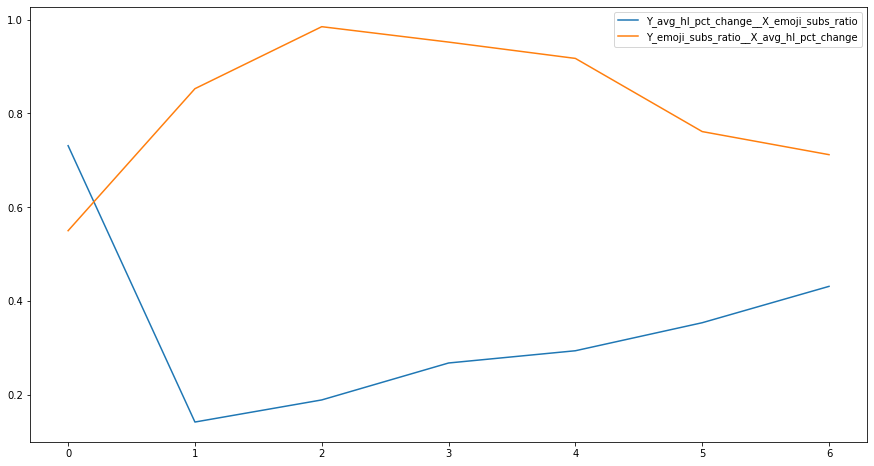

In [125]:
res=result_processing2(emjres.emoji_subs_ratio,btc.avg_hl,resample_period='d')
inm=res[['emoji_subs_ratio','avg_hl_pct_change']].dropna()
eval.get_granger_causality(inm,maxlag=7).plot(figsize=(15,8))

In [30]:
s['all_text_capped']=s.all_text.apply(lambda x: ' '.join(x.split()[:140]))

C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
s['distil_bert']=s.title.progress_apply(cm.distil_bert)

100%|██████████| 16227/16227 [06:17<00:00, 42.96it/s]
C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
s['fin_bert']=s.title.progress_apply(cm.fin_bert)

100%|██████████| 16227/16227 [13:03<00:00, 20.72it/s]
C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
s['pos']=s.fin_bert.apply(lambda x: x[0])
s['neg']=s.fin_bert.apply(lambda x: x[1])
s['neut']=s.fin_bert.apply(lambda x: x[2])

s['neg_distil']=s.distil_bert.apply(lambda x: x[0])
s['post_distil']=s.distil_bert.apply(lambda x: x[1])
top=s.copy()

C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

<AxesSubplot:xlabel='created'>

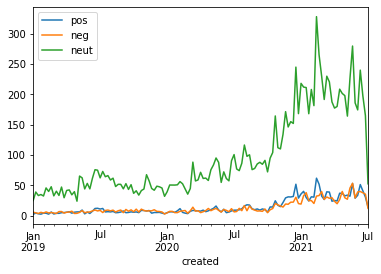

In [60]:
top[['pos','neg','neut']].resample('w').sum().plot()

<AxesSubplot:xlabel='created'>

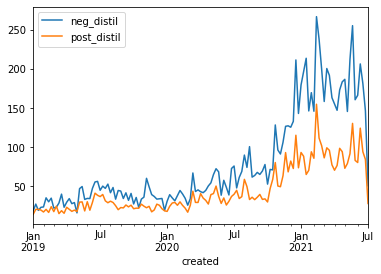

In [58]:
top[['neg_distil','post_distil']].resample('w').sum().plot()

In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [187]:
dchunk='d'
a=top.resample(dchunk).sum()[['neg','pos','neut']]
btc_price=pd.read_csv(r"C:\Users\Ben\Desktop\Diplomatiki\CryptoSent\Datasets\other\coin_Bitcoin.csv")
btc_price.Date=pd.to_datetime(btc_price.Date)
btc_price=btc_price.set_index('Date')
btc_price['avg_price']=(btc_price.High+btc_price.Low)/2

btc_price_avg=btc_price.resample(dchunk).mean().loc['2019':'2021-06']['avg_price']

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])



fig.add_trace(
    go.Scatter(x=a.index, y=(a.pos-a.neg), name="FinBert Sentiment"),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(x=btc_price_avg.index, y=btc_price_avg.diff(), name="Bit Coin Avg"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="BTC vs Sentiment Model "
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Sentiment Polarity </b>", secondary_y=False)
fig.update_yaxes(title_text="<b>BTC Price</b>", secondary_y=True)

fig.show()

In [188]:
btc=btc_price_avg.diff().dropna()

In [196]:
gc=pd.concat([btc,
((top.post_distil-top.neg_distil).resample('d').sum()).rename('distil_bert'),
(a.pos-a.neg).tail(-1).rename('fin_bert')],axis=1).dropna()

In [203]:
(a.pos-a.neg).rename('fin_bert')

created
2019-01-01   -0.390011
2019-01-02   -3.064867
2019-01-03   -0.000574
2019-01-04   -0.054681
2019-01-05    0.376955
                ...   
2021-06-26   -1.671397
2021-06-27   -2.057088
2021-06-28   -0.038014
2021-06-29   -2.449407
2021-06-30    4.744237
Freq: D, Name: fin_bert, Length: 912, dtype: float64

In [197]:
gc

,avg_price,distil_bert,fin_bert
2019-01-02,103.622851,-2.986790,-3.064867
2019-01-03,-1.741384,0.730157,-0.000574
2019-01-04,-56.059902,0.933188,-0.054681
2019-01-05,46.007512,-0.163784,0.376955
2019-01-06,89.003642,-1.866696,-0.337447
...,...,...,...
2021-06-26,-2008.021437,-8.237820,-1.671397
2021-06-27,1952.897758,-9.218547,-2.057088
2021-06-28,1197.041590,-11.315186,-0.038014
2021-06-29,836.314113,-10.208426,-2.449407


In [198]:
grangercausalitytests(gc[['fin_bert','avg_price']],maxlag=4);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=45.9003 , p=0.0000  , df_denom=907, df_num=1
ssr based chi2 test:   chi2=46.0521 , p=0.0000  , df=1
likelihood ratio test: chi2=44.9247 , p=0.0000  , df=1
parameter F test:         F=45.9003 , p=0.0000  , df_denom=907, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=24.1487 , p=0.0000  , df_denom=904, df_num=2
ssr based chi2 test:   chi2=48.5645 , p=0.0000  , df=2
likelihood ratio test: chi2=47.3117 , p=0.0000  , df=2
parameter F test:         F=24.1487 , p=0.0000  , df_denom=904, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=17.9103 , p=0.0000  , df_denom=901, df_num=3
ssr based chi2 test:   chi2=54.1484 , p=0.0000  , df=3
likelihood ratio test: chi2=52.5953 , p=0.0000  , df=3
parameter F test:         F=17.9103 , p=0.0000  , df_denom=901, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=15.3204 , p=0.0000  

In [199]:
grangercausalitytests(gc[['avg_price','fin_bert']],maxlag=4);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0256  , p=0.8729  , df_denom=907, df_num=1
ssr based chi2 test:   chi2=0.0257  , p=0.8726  , df=1
likelihood ratio test: chi2=0.0257  , p=0.8726  , df=1
parameter F test:         F=0.0256  , p=0.8729  , df_denom=907, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.8538  , p=0.0080  , df_denom=904, df_num=2
ssr based chi2 test:   chi2=9.7612  , p=0.0076  , df=2
likelihood ratio test: chi2=9.7092  , p=0.0078  , df=2
parameter F test:         F=4.8538  , p=0.0080  , df_denom=904, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6809  , p=0.0118  , df_denom=901, df_num=3
ssr based chi2 test:   chi2=11.1286 , p=0.0111  , df=3
likelihood ratio test: chi2=11.0609 , p=0.0114  , df=3
parameter F test:         F=3.6809  , p=0.0118  , df_denom=901, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6502  , p=0.0321  

In [136]:
print('Negative')
adf_test(a.neg)
print('Positive')
adf_test(a.pos)
print('Neutural')
adf_test(a.neut)

Negative
ADF Statistics: 0.658092
p-value: 0.988963
Critical values:
	1%: -3.487
	5%: -2.886
	10%: -2.580
Positive
ADF Statistics: -0.634765
p-value: 0.862931
Critical values:
	1%: -3.485
	5%: -2.885
	10%: -2.579
Neutural
ADF Statistics: -0.875673
p-value: 0.795878
Critical values:
	1%: -3.485
	5%: -2.885
	10%: -2.579


In [137]:

from statsmodels.tsa.stattools import kpss

def kpss_test(df):    
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
        
print('KPSS Test: Apple time series')
kpss_test(a['pos'])
print('KPSS Test: Walmart time series')
kpss_test(a['neg'])
print('KPSS Test: Tesla time series')
kpss_test(a['neut'])

KPSS Test: Apple time series
KPSS Statistic: 1.4822883362170491
p-value: 0.01
num lags: 6
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: Walmart time series
KPSS Statistic: 1.429694166443776
p-value: 0.01
num lags: 6
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: Tesla time series
KPSS Statistic: 1.5218360017886652
p-value: 0.01
num lags: 6
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\statsmodels\tsa\stattools.py:2012: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\statsmodels\tsa\stattools.py:2012: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\statsmodels\tsa\stattools.py:2012: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [179]:
sdf=top[top.score>200]

<AxesSubplot:xlabel='created'>

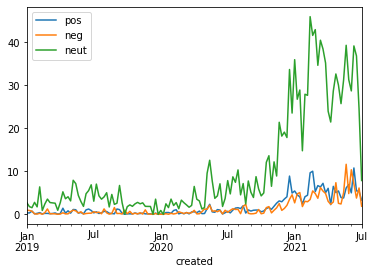

In [181]:
sdf[['pos','neg','neut']].resample('w').sum().plot()

<AxesSubplot:xlabel='created'>

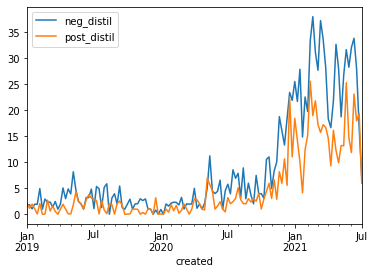

In [182]:
sdf[['neg_distil','post_distil']].resample('w').sum().plot()

In [183]:
dchunk='w'
a=sdf.resample(dchunk).sum()[['neg','pos','neut']]
btc_price=pd.read_csv(r"C:\Users\Ben\Desktop\Diplomatiki\CryptoSent\Datasets\other\coin_Bitcoin.csv")
btc_price.Date=pd.to_datetime(btc_price.Date)
btc_price=btc_price.set_index('Date')
btc_price['avg_price']=(btc_price.High+btc_price.Low)/2

btc_price_avg=btc_price.resample(dchunk).mean().loc['2019':'2021-06']['avg_price']

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])



fig.add_trace(
    go.Scatter(x=a.index, y=(a.pos-a.neg), name="FinBert Sentiment"),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(x=btc_price_avg.index, y=btc_price_avg.diff(), name="Bit Coin Avg"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="BTC vs Sentiment Model "
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Sentiment Polarity </b>", secondary_y=False)
fig.update_yaxes(title_text="<b>BTC Price</b>", secondary_y=True)

fig.show()

In [184]:
gc=pd.concat([btc,
((top.post_distil-top.neg_distil).resample('w').sum()).rename('distil_bert'),
(a.pos-a.neg).rename('fin_bert')],axis=1).dropna()

In [185]:
grangercausalitytests(gc[['fin_bert','avg_price']],maxlag=4);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8808  , p=0.3498  , df_denom=125, df_num=1
ssr based chi2 test:   chi2=0.9020  , p=0.3423  , df=1
likelihood ratio test: chi2=0.8988  , p=0.3431  , df=1
parameter F test:         F=0.8808  , p=0.3498  , df_denom=125, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1634  , p=0.8494  , df_denom=122, df_num=2
ssr based chi2 test:   chi2=0.3402  , p=0.8436  , df=2
likelihood ratio test: chi2=0.3397  , p=0.8438  , df=2
parameter F test:         F=0.1634  , p=0.8494  , df_denom=122, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7110  , p=0.5473  , df_denom=119, df_num=3
ssr based chi2 test:   chi2=2.2586  , p=0.5205  , df=3
likelihood ratio test: chi2=2.2386  , p=0.5244  , df=3
parameter F test:         F=0.7110  , p=0.5473  , df_denom=119, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4105  , p=0.2348  

In [186]:
grangercausalitytests(gc[['avg_price','fin_bert']],maxlag=4);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9973  , p=0.3199  , df_denom=125, df_num=1
ssr based chi2 test:   chi2=1.0212  , p=0.3122  , df=1
likelihood ratio test: chi2=1.0172  , p=0.3132  , df=1
parameter F test:         F=0.9973  , p=0.3199  , df_denom=125, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5549  , p=0.5756  , df_denom=122, df_num=2
ssr based chi2 test:   chi2=1.1552  , p=0.5612  , df=2
likelihood ratio test: chi2=1.1500  , p=0.5627  , df=2
parameter F test:         F=0.5549  , p=0.5756  , df_denom=122, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8288  , p=0.1456  , df_denom=119, df_num=3
ssr based chi2 test:   chi2=5.8092  , p=0.1213  , df=3
likelihood ratio test: chi2=5.6792  , p=0.1283  , df=3
parameter F test:         F=1.8288  , p=0.1456  , df_denom=119, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9826  , p=0.1017  